In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
transform  =  transforms.ToTensor()

In [6]:
train_data = datasets.MNIST(root='../Data',train=True,download=True,transform=transform)

100.1%

Extracting ../Data\MNIST\raw\train-images-idx3-ubyte.gz


0.0%

4.5%5%

Extracting ../Data\MNIST\raw\train-labels-idx1-ubyte.gz


100.4%

Extracting ../Data\MNIST\raw\t10k-images-idx3-ubyte.gz


180.4%

Extracting ../Data\MNIST\raw\t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [7]:
test_data = datasets.MNIST(root='../Data',train=False,download=True,transform=transform)

In [8]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ../Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [9]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: ../Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [10]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [13]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [14]:
image,label = train_data[0]

In [16]:
image.shape

torch.Size([1, 28, 28])

In [17]:
label

5

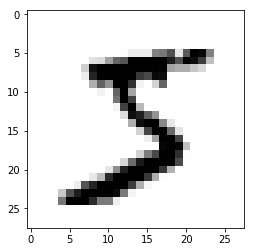

In [22]:
plt.imshow(image.reshape(28,28),cmap='gist_yarg');  # Actual image is not in this color, it just is a default colour scale in imshow

In [71]:
train_loader = DataLoader(train_data,batch_size=100,shuffle=True)

test_loader = DataLoader(test_data,batch_size=500,shuffle=False)

In [72]:
train_loader

In [73]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))  # Formatting for print

In [74]:
for images, labels in train_loader:
    break

In [75]:
images.shape

torch.Size([100, 1, 28, 28])

In [76]:
labels.shape

torch.Size([100])

Labels:  [   3    0    6    9    4    1    8    7    4    7    9    4]


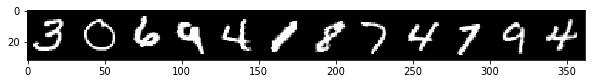

In [77]:
print('Labels: ', labels[:12].numpy())
im = make_grid(images[:12], nrow=12)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(), (1,2,0)));

In [78]:
class MultilayerPerceptron(nn.Module):
    
    def __init__(self,in_sz=784,out_sz=10,layers=[120,84]):
        
        super().__init__()
        
        self.fc1 = nn.Linear(in_sz,layers[0])
        self.fc2 = nn.Linear(layers[0],layers[1])
        self.fc3 = nn.Linear(layers[1],out_sz)
        
    def forward(self,X):
        
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        
        return F.log_softmax(X,dim=1)

In [79]:
model = MultilayerPerceptron()

In [80]:
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [81]:
for param in model.parameters():
    print(param.numel())

94080
120
10080
84
840
10


In [82]:
94080 + 120 + 10080 + 84 + 840 + 10

105214

In [83]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [84]:
images.shape

torch.Size([100, 1, 28, 28])

In [85]:
images.reshape(100,-1)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [86]:
import time
start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    
    trn_corr = 0
    tst_corr = 0
    
    for b, (X_train,y_train) in enumerate(train_loader):
        
        b+=1
        
        y_pred = model(X_train.reshape(100,-1))
        loss = criterion(y_pred,y_train)
        
        predicted = torch.max(y_pred.data,1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if b%200 == 0:
            accuracy = trn_corr.item()*100/(100*b)
            print(f'Epoch {i}  batch {b}  loss:{loss.item()}  accuracy:{accuracy}')
            
    train_losses.append(loss)
    train_correct.append(trn_corr)
    
    with torch.no_grad():
        
        for b, (X_test,y_test) in enumerate(test_loader):
            
            y_val = model(X_test.reshape(500,-1))
            predicted = torch.max(y_val.data,1)[1]
            tst_corr += (predicted==y_test).sum()
            
    loss = criterion(y_val,y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        

total_time = time.time() - start_time
print(f'Duration: {total_time/60} min')

Epoch 0  batch 200  loss:0.3700636327266693  accuracy:82.765
Epoch 0  batch 400  loss:0.13832628726959229  accuracy:87.525
Epoch 0  batch 600  loss:0.07954302430152893  accuracy:89.70166666666667
Epoch 1  batch 200  loss:0.20123952627182007  accuracy:94.96
Epoch 1  batch 400  loss:0.12413964420557022  accuracy:95.2975
Epoch 1  batch 600  loss:0.16721239686012268  accuracy:95.43166666666667
Epoch 2  batch 200  loss:0.11345148831605911  accuracy:96.585
Epoch 2  batch 400  loss:0.09534429758787155  accuracy:96.685
Epoch 2  batch 600  loss:0.19274574518203735  accuracy:96.70333333333333
Epoch 3  batch 200  loss:0.05225476622581482  accuracy:97.52
Epoch 3  batch 400  loss:0.0655408576130867  accuracy:97.5025
Epoch 3  batch 600  loss:0.07255163043737411  accuracy:97.425
Epoch 4  batch 200  loss:0.02138819918036461  accuracy:98.185
Epoch 4  batch 400  loss:0.03961707651615143  accuracy:98.1325
Epoch 4  batch 600  loss:0.03517839312553406  accuracy:98.07666666666667
Epoch 5  batch 200  loss:0.

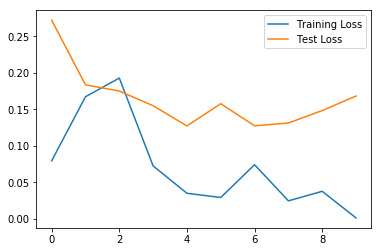

In [91]:
plt.plot(train_losses,label='Training Loss')
plt.plot(test_losses,label='Test Loss')
plt.legend();

In [94]:
train_acc = [t/600 for t in train_correct]

In [96]:
test_acc = [t/100 for t in test_correct]

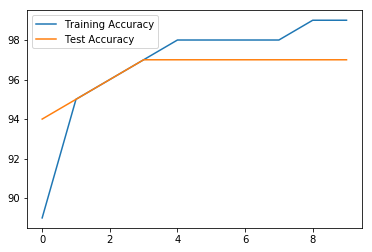

In [97]:
plt.plot(train_acc,label='Training Accuracy')
plt.plot(test_acc,label='Test Accuracy')
plt.legend();

In [98]:
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [100]:
with torch.no_grad():
    correct = 0
    
    for X_test, y_test in test_load_all:
        y_val = model(X_test.reshape(len(X_test),-1))
        predicted = torch.max(y_val,1)[1]
        correct += (predicted==y_test).sum()

In [101]:
correct.item()/len(test_data)*100

97.53

In [102]:
confusion_matrix(predicted.view(-1),y_test.view(-1))

array([[ 972,    0,    4,    1,    1,    3,    5,    2,    7,    1],
       [   0, 1118,    0,    0,    0,    0,    2,    2,    0,    2],
       [   0,    1,  995,    0,    2,    0,    3,    6,    3,    0],
       [   3,    6,   15, 1003,    1,   21,    2,    5,    8,    8],
       [   1,    0,    3,    0,  961,    1,    8,    2,    3,   11],
       [   1,    1,    0,    2,    1,  859,    4,    1,    7,    5],
       [   0,    3,    1,    0,    3,    2,  934,    0,    1,    0],
       [   0,    1,    5,    2,    0,    1,    0,  997,    3,    0],
       [   1,    5,    9,    2,    0,    4,    0,    6,  938,    6],
       [   2,    0,    0,    0,   13,    1,    0,    7,    4,  976]],
      dtype=int64)